In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def asignar_instantes(data: pd.DataFrame) -> list[float]:
    data["Instante"] = data["t"].rank(method='dense').astype(int)
    return data

def asignar_celdas(data: pd.DataFrame) -> list[float]:
    data["Celda"] = data["x"].rank(method='dense').astype(int)
    return data

color_py = "red"
color_cpp = "green"

### COMPARACIÓN PYCLAW  SET1 ###

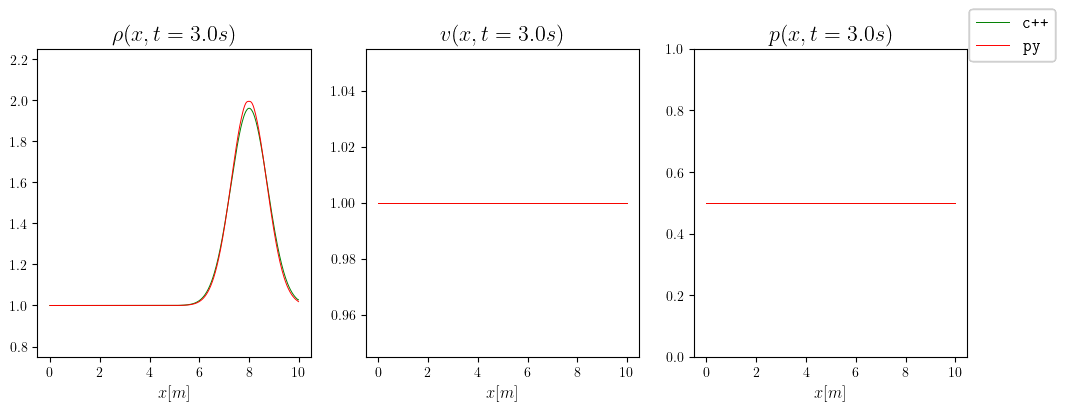

In [2]:
# Obtener datos de simulación c++
# Obtener nombre de carpeta donde se encuentran los resultados
folder_resultado = "py_gauss199"
path_folder = f"..\\data\\{folder_resultado}\\"
directorios = {var: path_folder + var + ".dat" for var in ["densidad", "velocidad", "presion"]}
# Elaboración dataframe con datos de simulación c++
data_variable = {}
data_variable["densidad"] = pd.read_csv(directorios.get("densidad"), delimiter="\t", names=["t", "x", "rho"])
data_variable["velocidad"] = pd.read_csv(directorios.get("velocidad"), delimiter="\t", names=["t", "x", "u"])
data_variable["presion"] = pd.read_csv(directorios.get("presion"), delimiter="\t", names=["t", "x", "p"])
# Asignar CORRELATIVO de instantes
data_variable = {x: asignar_instantes(data_variable[x]) for x in data_variable.keys()}
datos = data_variable["densidad"].join(data_variable["velocidad"]["u"]).join(data_variable["presion"]["p"])
# Asignar CORRELATIVO de celdas
datos = asignar_celdas(datos)
# Importación de datos de simulación con pyclaw
data_pyclaw: pd.DataFrame
data_pyclaw = pd.read_csv("..\\data_pyclaw\\data_solucion_set1.csv", sep="\t")
data_pyclaw = asignar_instantes(data_pyclaw)
data_pyclaw = asignar_celdas(data_pyclaw)
# Renombrar columnas de datos propios de simulación de pyclaw
nuevos_nombres_cols = {col:(col + "_py") for col in data_pyclaw.columns if col in ("densidad",
                                                                    "presion",
                                                                    "velocidad",
                                                                    "t",
                                                                    "x")}
data_pyclaw = data_pyclaw.rename(columns=nuevos_nombres_cols)
# Extraer columnas necesarias
data_pyclaw = data_pyclaw[[x for x in data_pyclaw.columns if x[-2:] == "py" or x in ("Instante", "Celda")]]
# Fusión de bases de c++ y pyclaw
data_total = pd.merge(datos, data_pyclaw, how="inner", on=["Instante", "Celda"])
data_total.to_csv("..\\data_cpp_y_pyclaw\\set1.csv", index=False)

# Elaboración de gráficas
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
instantes_a_graficar = [1, 2, 3, 4, 5, 6]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1: plt.Axes
ax2: plt.Axes
ax3: plt.Axes
for instante in instantes_a_graficar:
    time_stamp = instante
    frame_datos = data_total.query("Instante == @time_stamp")
    time_secs = frame_datos["t"].values[0]
    ax1.clear()
    # Configuraciones plots
    tamaño_titulo = 16
    margen = 0.25
    min_rho = data_total['rho'].min() - (data_total['rho'].max()-data_total['rho'].min())*margen
    max_rho = data_total['rho'].max() + (data_total['rho'].max()-data_total['rho'].min())*margen
    
    ax1.set_ylim(min_rho, max_rho)
    ax1.plot(frame_datos["x"], frame_datos["rho"], label=r"\texttt{c++}",color=color_cpp, linewidth = 0.7)
    ax1.plot(frame_datos["x"], frame_datos["densidad_py"], label=r"\texttt{py}",color=color_py, linewidth = 0.7)
    ax1.set_title(r"$\rho(x, t =" + str(time_secs) + r"s)$", fontsize=tamaño_titulo)
    ax1.set_xlabel(r"$x[m]$", fontsize=12)
    ax2.clear()
    ax2.plot(frame_datos["x"], frame_datos["u"], color=color_cpp, linewidth = 0.7)
    ax2.plot(frame_datos["x"], frame_datos["velocidad_py"], color=color_py, linewidth = 0.7)
    ax2.set_title(r"$v(x, t =" + str(time_secs) + r"s)$", fontsize=tamaño_titulo)
    ax2.set_xlabel(r"$x[m]$", fontsize=12)
    ax3.clear()
    ax3.set_ylim(0.0, 1)
    ax3.plot(frame_datos["x"], frame_datos["p"], color=color_cpp, linewidth = 0.7)
    ax3.plot(frame_datos["x"], frame_datos["presion_py"], color=color_py, linewidth = 0.7)
    ax3.set_title(r"$p(x, t =" + str(time_secs) + r"s)$", fontsize=tamaño_titulo)
    ax3.set_xlabel(r"$x[m]$", fontsize=12)
    fig.legend(fontsize = 12, loc='upper right', bbox_to_anchor=(0.98, 1.0))
    plt.savefig(f'py_sin_claw/{folder_resultado}/{time_stamp}.pdf',bbox_inches='tight', pad_inches=0.05, format='pdf')

### COMPARACIÓN PYCLAW SET2 ###

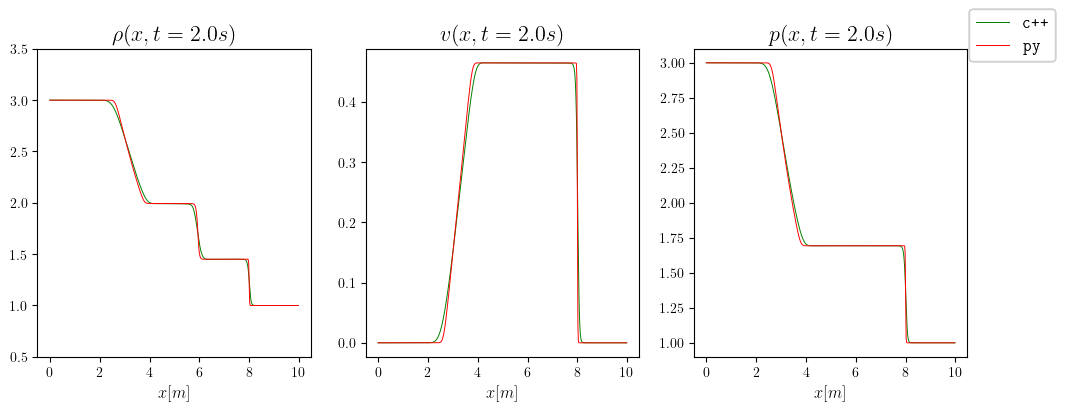

In [3]:
# Obtener datos de simulación c++
# Obtener nombre de carpeta donde se encuentran los resultados
folder_resultado = "py_sod659"
path_folder = f"..\\data\\{folder_resultado}\\"
directorios = {var: path_folder + var + ".dat" for var in ["densidad", "velocidad", "presion"]}
# Elaboración dataframe con datos de simulación c++
data_variable = {}
data_variable["densidad"] = pd.read_csv(directorios.get("densidad"), delimiter="\t", names=["t", "x", "rho"])
data_variable["velocidad"] = pd.read_csv(directorios.get("velocidad"), delimiter="\t", names=["t", "x", "u"])
data_variable["presion"] = pd.read_csv(directorios.get("presion"), delimiter="\t", names=["t", "x", "p"])
# Asignar CORRELATIVO de instantes
data_variable = {x: asignar_instantes(data_variable[x]) for x in data_variable.keys()}
datos = data_variable["densidad"].join(data_variable["velocidad"]["u"]).join(data_variable["presion"]["p"])
# Asignar CORRELATIVO de celdas
datos = asignar_celdas(datos)
# Importación de datos de simulación con pyclaw
nombre_archivo_pyclaw = "data_solucion_set2.csv"
data_pyclaw: pd.DataFrame
data_pyclaw = pd.read_csv(f"..\\data_pyclaw\\{nombre_archivo_pyclaw}", sep="\t")
data_pyclaw = asignar_instantes(data_pyclaw)
data_pyclaw = asignar_celdas(data_pyclaw)
# Renombrar columnas de datos propios de simulación de pyclaw
nuevos_nombres_cols = {col:(col + "_py") for col in data_pyclaw.columns if col in ("densidad",
                                                                    "presion",
                                                                    "velocidad",
                                                                    "t",
                                                                    "x")}
data_pyclaw = data_pyclaw.rename(columns=nuevos_nombres_cols)
# Extraer columnas necesarias
data_pyclaw = data_pyclaw[[x for x in data_pyclaw.columns if x[-2:] == "py" or x in ("Instante", "Celda")]]
# Fusión de bases de c++ y pyclaw
data_total = pd.merge(datos, data_pyclaw, how="inner", on=["Instante", "Celda"])
# Impresión de base con datos de c++ y pyclaw
data_total.to_csv("..\\data_cpp_y_pyclaw\\set2.csv", index=False)

# Elaboración de gráficas
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
instantes_a_graficar = [1, 2, 3, 4, 5, 6]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1: plt.Axes
ax2: plt.Axes
ax3: plt.Axes
for instante in instantes_a_graficar:
    time_stamp = instante
    frame_datos = data_total.query("Instante == @time_stamp")
    time_secs = frame_datos["t"].values[0]
    ax1.clear()
    # Configuraciones plots
    tamaño_titulo = 16
    margen = 0.25
    min_rho = data_total['rho'].min() - (data_total['rho'].max()-data_total['rho'].min())*margen
    max_rho = data_total['rho'].max() + (data_total['rho'].max()-data_total['rho'].min())*margen
    
    ax1.set_ylim(min_rho, max_rho)
    ax1.plot(frame_datos["x"], frame_datos["rho"], label=r"\texttt{c++}",color=color_cpp, linewidth = 0.7)
    ax1.plot(frame_datos["x"], frame_datos["densidad_py"], label=r"\texttt{py}",color=color_py, linewidth = 0.7)
    ax1.set_title(r"$\rho(x, t =" + str(time_secs) + r"s)$", fontsize=tamaño_titulo)
    ax1.set_xlabel(r"$x[m]$", fontsize=12)
    ax2.clear()
    ax2.plot(frame_datos["x"], frame_datos["u"], color=color_cpp, linewidth = 0.7)
    ax2.plot(frame_datos["x"], frame_datos["velocidad_py"], color=color_py, linewidth = 0.7)
    ax2.set_title(r"$v(x, t =" + str(time_secs) + r"s)$", fontsize=tamaño_titulo)
    ax2.set_xlabel(r"$x[m]$", fontsize=12)
    ax3.clear()
    ax3.plot(frame_datos["x"], frame_datos["p"], color=color_cpp, linewidth = 0.7)
    ax3.plot(frame_datos["x"], frame_datos["presion_py"], color=color_py, linewidth = 0.7)
    ax3.set_title(r"$p(x, t =" + str(time_secs) + r"s)$", fontsize=tamaño_titulo)
    ax3.set_xlabel(r"$x[m]$", fontsize=12)
    fig.legend(fontsize = 12, loc='upper right', bbox_to_anchor=(0.98, 1.0))
    plt.savefig(f'py_sin_claw/{folder_resultado}/{time_stamp}.pdf',bbox_inches='tight', pad_inches=0.05, format='pdf')

### COMPARACIÓN PYCLAW SET 3

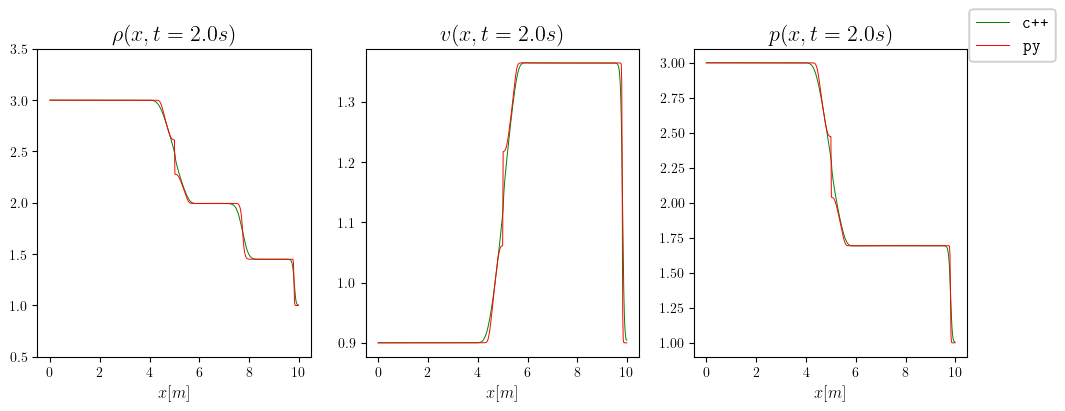

In [5]:
# Obtener datos de simulación c++
# Obtener nombre de carpeta donde se encuentran los resultados
folder_resultado = "py_leveque518"
path_folder = f"..\\data\\{folder_resultado}\\"
directorios = {var: path_folder + var + ".dat" for var in ["densidad", "velocidad", "presion"]}
# Elaboración dataframe con datos de simulación c++
data_variable = {}
data_variable["densidad"] = pd.read_csv(directorios.get("densidad"), delimiter="\t", names=["t", "x", "rho"])
data_variable["velocidad"] = pd.read_csv(directorios.get("velocidad"), delimiter="\t", names=["t", "x", "u"])
data_variable["presion"] = pd.read_csv(directorios.get("presion"), delimiter="\t", names=["t", "x", "p"])
# Asignar CORRELATIVO de instantes
data_variable = {x: asignar_instantes(data_variable[x]) for x in data_variable.keys()}
datos = data_variable["densidad"].join(data_variable["velocidad"]["u"]).join(data_variable["presion"]["p"])
# Asignar CORRELATIVO de celdas
datos = asignar_celdas(datos)
# Importación de datos de simulación con pyclaw
nombre_archivo_pyclaw = "data_solucion_set3.csv"
data_pyclaw: pd.DataFrame
data_pyclaw = pd.read_csv(f"..\\data_pyclaw\\{nombre_archivo_pyclaw}", sep="\t")
data_pyclaw = asignar_instantes(data_pyclaw)
data_pyclaw = asignar_celdas(data_pyclaw)
# Renombrar columnas de datos propios de simulación de pyclaw
nuevos_nombres_cols = {col:(col + "_py") for col in data_pyclaw.columns if col in ("densidad",
                                                                    "presion",
                                                                    "velocidad",
                                                                    "t",
                                                                    "x")}
data_pyclaw = data_pyclaw.rename(columns=nuevos_nombres_cols)
# Extraer columnas necesarias
data_pyclaw = data_pyclaw[[x for x in data_pyclaw.columns if x[-2:] == "py" or x in ("Instante", "Celda")]]
# Fusión de bases de c++ y pyclaw
data_total = pd.merge(datos, data_pyclaw, how="inner", on=["Instante", "Celda"])

data_total.to_csv("..\\data_cpp_y_pyclaw\\set3.csv", index=False)

# Elaboración de gráficas
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
instantes_a_graficar = [1, 2, 3, 4, 5, 6]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1: plt.Axes
ax2: plt.Axes
ax3: plt.Axes
for instante in instantes_a_graficar:
    time_stamp = instante
    frame_datos = data_total.query("Instante == @time_stamp")
    time_secs = frame_datos["t"].values[0]
    ax1.clear()
    # Configuraciones plots
    tamaño_titulo = 16
    margen = 0.25
    min_rho = data_total['rho'].min() - (data_total['rho'].max()-data_total['rho'].min())*margen
    max_rho = data_total['rho'].max() + (data_total['rho'].max()-data_total['rho'].min())*margen
    
    ax1.set_ylim(min_rho, max_rho)
    ax1.plot(frame_datos["x"], frame_datos["rho"], label=r"\texttt{c++}",color=color_cpp, linewidth = 0.7)
    ax1.plot(frame_datos["x"], frame_datos["densidad_py"], label=r"\texttt{py}",color=color_py, linewidth = 0.7)
    ax1.set_title(r"$\rho(x, t =" + str(time_secs) + r"s)$", fontsize=tamaño_titulo)
    ax1.set_xlabel(r"$x[m]$", fontsize=12)
    ax2.clear()
    ax2.plot(frame_datos["x"], frame_datos["u"], color=color_cpp, linewidth = 0.7)
    ax2.plot(frame_datos["x"], frame_datos["velocidad_py"], color=color_py, linewidth = 0.7)
    ax2.set_title(r"$v(x, t =" + str(time_secs) + r"s)$", fontsize=tamaño_titulo)
    ax2.set_xlabel(r"$x[m]$", fontsize=12)
    ax3.clear()
    ax3.plot(frame_datos["x"], frame_datos["p"], color=color_cpp, linewidth = 0.7)
    ax3.plot(frame_datos["x"], frame_datos["presion_py"], color=color_py, linewidth = 0.7)
    ax3.set_title(r"$p(x, t =" + str(time_secs) + r"s)$", fontsize=tamaño_titulo)
    ax3.set_xlabel(r"$x[m]$", fontsize=12)
    fig.legend(fontsize = 12, loc='upper right', bbox_to_anchor=(0.98, 1.0))
    plt.savefig(f'py_sin_claw/{folder_resultado}/{time_stamp}.pdf',bbox_inches='tight', pad_inches=0.05, format='pdf')